In [9]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
#Creating data path for the relevant data
DATA_PATH = '../data/PhysicalFlows_12.1.G/*.csv' 
files = glob.glob(DATA_PATH)
#Initializing empty list to store all files
dataframes = []
for f in files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
#Concatenating all files into one dataframe
flowdata = pd.concat(dataframes, ignore_index = True)
flowdata


,DateTime,InMapCode,OutMapCode,FlowValue
0,2019-01-01 00:00:00,AL,GR,173.00
1,2019-01-01 01:00:00,AL,GR,145.00
2,2019-01-01 02:00:00,AL,GR,145.00
3,2019-01-01 03:00:00,AL,GR,133.00
4,2019-01-01 04:00:00,AL,GR,130.00
...,...,...,...,...
14402341,2023-12-31 19:00:00,XK,RS,418.85
14402342,2023-12-31 20:00:00,XK,RS,411.11
14402343,2023-12-31 21:00:00,XK,RS,485.37
14402344,2023-12-31 22:00:00,XK,RS,469.40


In [11]:
# Convert datetime to datetime, Extract the year, enabling us to work with the annual sums later
flowdata['DateTime'] = pd.to_datetime(flowdata['DateTime'])
flowdata['Year'] = flowdata['DateTime'].dt.year
#Filter relevant rows, in this case only when NO2 and Germany are InMap or OutMap
#Separate data for imports and exports for NO2 to/from Germany
imports = flowdata[(flowdata['InMapCode'] == 'NO2') & (flowdata['OutMapCode'] == 'DE_LU')]
exports = flowdata[(flowdata['OutMapCode'] == 'NO2') & (flowdata['InMapCode'] == 'DE_LU')]

#Calculating annual sums of imports and exports
annual_imports = imports.groupby('Year')['FlowValue'].sum()
annual_exports = exports.groupby('Year')['FlowValue'].sum()


In [12]:
# Step 4: Combine imports and exports into a DataFrame for plotting
annual_data = pd.DataFrame({
    'Imports': annual_imports,
    'Exports': annual_exports
}).fillna(0)  # Fill NaNs with 0 in case any years have no data
annual_data
#Important to keep in mind imports and exports started in 2020 with NordLink, therefore no import/export in 2019

,Imports,Exports
Year,,
2020,5.034026e+04,1.942403e+05
2021,1.117788e+06,4.287291e+06
2022,1.643756e+06,5.423627e+06
2023,1.637431e+06,6.169167e+06


<Figure size 1000x600 with 0 Axes>

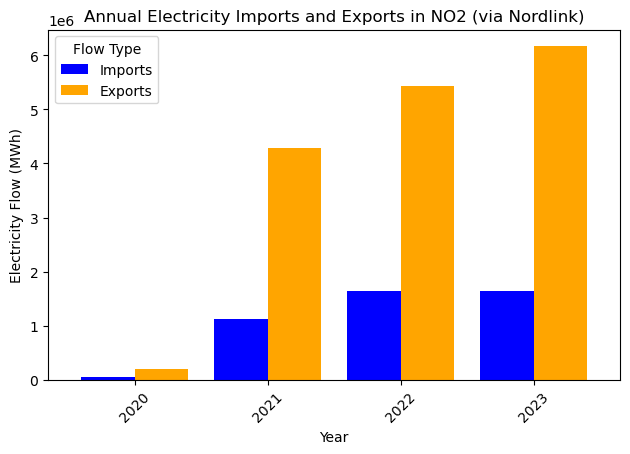

In [18]:
#Creating terms for figure
plt.figure(figsize=(10, 6))
#No need to write the x axis, as the index from dataframe will be used here by default
annual_data.plot.bar(y=['Imports', 'Exports'], stacked=False, width=0.8, rot = 45, color=['blue', 'orange'])

#Customizing our bar plot
plt.title('Annual Electricity Imports and Exports in NO2 (via Nordlink)')
plt.xlabel('Year')
plt.ylabel('Electricity Flow (MWh)')
plt.legend(title="Flow Type")
plt.tight_layout()

#Save the figure as a png file and show figure
plt.savefig('figure_task3.png')
plt.show()


Conclusion: 
As the bar chart shows, NO2 exports considerably more electricity to Germany than they import. Note that the amount of exports/imports in 2020 is reasonably low, due to the fact that NordLink opened on december 9, 2020. From there, the amount of import/export increases rapidly over the years. 